In [126]:
import os
import csv

import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

In [127]:
pd.__version__
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200

In [128]:
AARM_DEVICES = {
    "jetson_cpu": "Nvidia Jetson CPU Only",
    "jetson_gpu": "Nvidia Jetson GPU Enabled", 
    "rpi4_cpu": "Raspberry Pi 4B"
} # pi3_cpu

x86_DEVICES= {
    "herron_cpu": "Server Intel Xeon",
    "herron_gpu": "Server Nviidia RTX-8000",
    "laptop_cpu": "Laptop Intel-i7 (8th Generation)"
}

SEQ_LENGTHS = [2 ** seqlen for seqlen in range(10)]

In [129]:
BASELINE_TRANSFORMERS = {
    "bert": "BERT-Base",
    "roberta": "RoBERTa"
}

OTHER_TRANSFORMERS = {
    'longformer': "Longformer",
    'deberta': "DeBERTa",
    'albert': "Albert",
    'ibert': "ibert"
}
EFFICIENT_TRANSFORMERS = [
    "distilbert", "mobile_bert",  
    "squeeze_bert", "funnel_transformer"
]

In [130]:
BASELINE_VISUAL = [
    "resnet", "squeezenet", "vgg16", "vit32", "alexnet", 
    "densenet", "inception", "googlenet", "shufflenet",
    "resnext50_32x4d", "wide_resnet50_2"
]

EFFICIENT_VISUAL = [
    "efficientnet", "efficientnet_lite", "gernet", 
    "squeezenet", "mobilenet_v2", "mnasnet"
]

In [131]:
VISUAL_DIR = "experiments/0903_transformers"
LANGUAGE_DIR = "experiments/0903_transformers"
DEVICE_LIST = ["laptop_cpu", "herron_gpu", "herron_cpu"]

In [132]:
all_results = pd.concat([
    pd.read_csv(os.path.join(LANGUAGE_DIR, f"{device}.csv"))
    for device in DEVICE_LIST
])

In [140]:
all_results.loc[all_results['device'] == "herron_gpu"]



,accelerator,avg_memory,batch_size,device,macs,max_memory,mean,model,requires_grad,sequence_length,total_params,trainable_params
0,1.0,2.940994e+09,1.0,herron_gpu,8.552448e+07,2.940994e+09,0.005638,bert,0.0,1.0,109482240.0,0.0
1,1.0,2.940994e+09,1.0,herron_gpu,1.704591e+08,2.940994e+09,0.005956,bert,0.0,2.0,109482240.0,0.0
2,1.0,2.940994e+09,1.0,herron_gpu,3.403284e+08,2.940994e+09,0.006156,bert,0.0,4.0,109482240.0,0.0
3,1.0,2.940994e+09,1.0,herron_gpu,6.800671e+08,2.940994e+09,0.006218,bert,0.0,8.0,109482240.0,0.0
4,1.0,2.940994e+09,1.0,herron_gpu,1.359544e+09,2.940994e+09,0.006197,bert,0.0,16.0,109482240.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
82,1.0,2.683044e+09,1.0,herron_gpu,8.525906e+08,2.683044e+09,0.009266,squeeze_bert,0.0,32.0,51094272.0,0.0
83,1.0,2.683044e+09,1.0,herron_gpu,1.704591e+09,2.683044e+09,0.013689,squeeze_bert,0.0,64.0,51094272.0,0.0
84,1.0,2.687238e+09,1.0,herron_gpu,3.408593e+09,2.687238e+09,0.013611,squeeze_bert,0.0,128.0,51094272.0,0.0
85,1.0,2.710307e+09,1.0,herron_gpu,6.816596e+09,2.710307e+09,0.013684,squeeze_bert,0.0,256.0,51094272.0,0.0


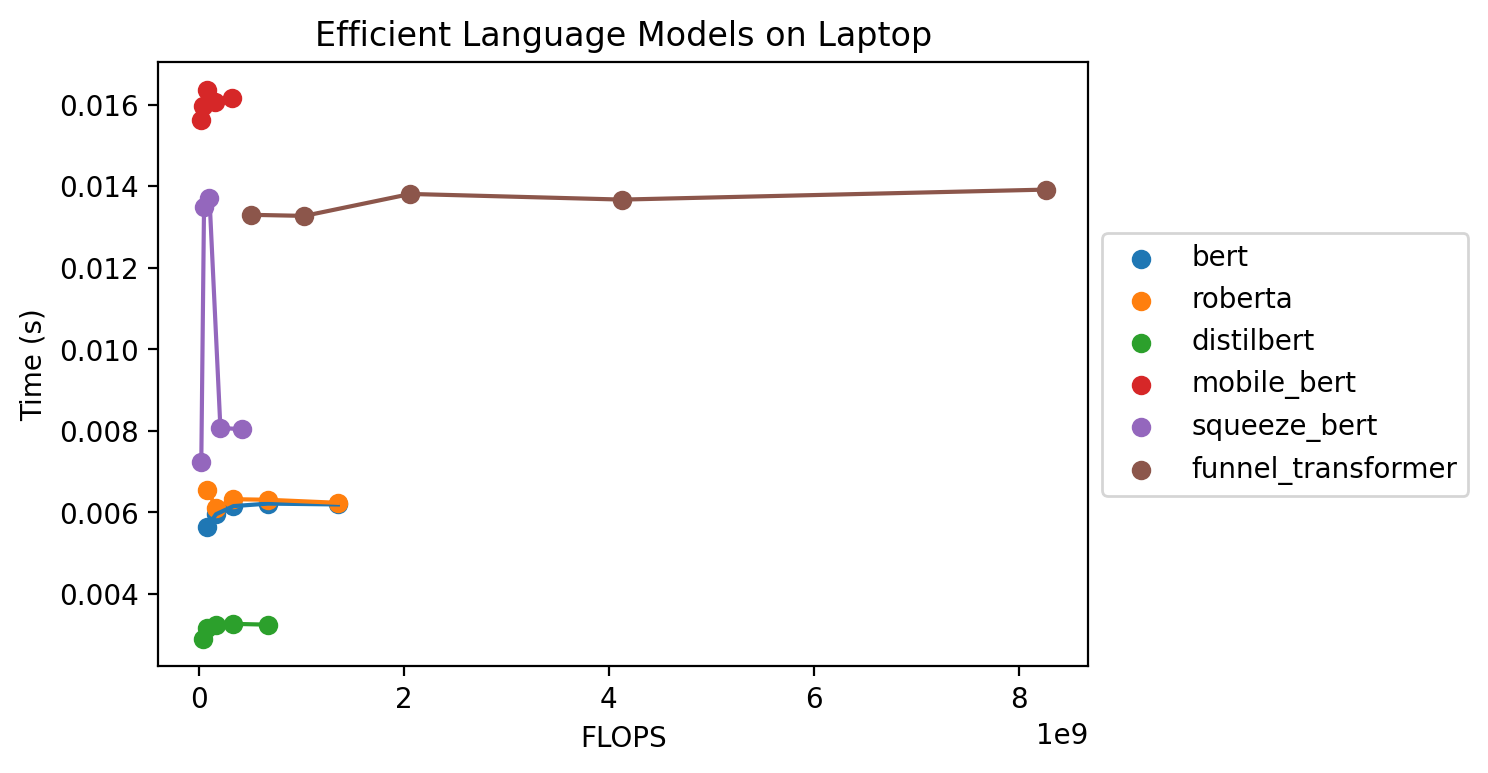

In [143]:


# for device in DEVICE_LIST:

results = all_results.loc[all_results['device'] == "herron_gpu"]
for model, model_name in BASELINE_TRANSFORMERS + EFFICIENT_TRANSFORMERS :
    seq_lens = results.loc[results['model'] == model]['sequence_length'].tolist()
    avg_memory = results.loc[results['model'] == model]['avg_memory'].tolist()
    mac_result = results.loc[results['model'] == model]['macs'].tolist()
    wallclock_result = results.loc[results['model'] == model]['mean'].tolist()
    param_count = results.loc[results['model'] == model]['total_params'].tolist()
    
    x_ax, x_label = mac_result[:5], "FLOPS"
    y_ax, y_label = wallclock_result[:5], "Time (s)"
    
    plt.xlabel(x_label)    
    plt.ylabel(y_label)
    plt.scatter(x_ax, y_ax, label=f"{model_name}")  
    plt.plot(x_ax,y_ax)

plt.title("Efficient Language Models on Laptop")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [84]:
all_results

,accelerator,avg_memory,batch_size,device,img_size,macs,max_memory,mean,model,requires_grad,total_params,trainable_params
0,0.0,3096.057292,1.0,cpu,224.0,4.363144e+09,3096.105469,0.247771,vit32,0.0,88224232.0,0.0
1,0.0,3439.528125,1.0,cpu,384.0,1.265614e+10,3440.007812,0.603277,vit32,0.0,88297192.0,0.0
2,0.0,3467.858594,1.0,cpu,448.0,1.719547e+10,3468.097656,0.834690,vit32,0.0,88337128.0,0.0
3,0.0,3779.401042,1.0,cpu,512.0,2.243315e+10,3779.578125,1.138817,vit32,0.0,88383208.0,0.0
4,0.0,2751.500000,1.0,cpu,224.0,5.400159e+09,2751.500000,0.247940,efficientnet,0.0,54139356.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
59,0.0,2931.298651,1.0,cpu,512.0,5.969119e+10,2978.070312,1.830927,wide_resnet50_2,0.0,68883240.0,0.0
60,0.0,2752.789062,1.0,cpu,224.0,3.253292e+08,2753.718750,0.019819,mnasnet,0.0,4383312.0,0.0
61,0.0,2783.708767,1.0,cpu,384.0,9.535877e+08,2786.785156,0.060840,mnasnet,0.0,4383312.0,0.0
62,0.0,2800.941732,1.0,cpu,448.0,1.297477e+09,2814.652344,0.087032,mnasnet,0.0,4383312.0,0.0
